# Import

In [1]:
import os, sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import clear_output
from tqdm import tqdm

project_root = os.path.dirname(os.getcwd())
sys.path.append(project_root)

from scripts.utils import load_image, display_image
from scripts.colorimetry import match_colors

In [23]:
data_path = project_root + '/data/'
style_image = load_image(data_path + '/style/starry_night.jpg', target_size=(256, 256))

In [3]:
import sys
sys.path.append(project_root)
from models.style_transfer import StyleTransferModel, CONTENT_LAYERS, STYLE_LAYERS, get_feature_extractor, get_vgg
import json
hyperparams = json.load(open(project_root + '/models/hyperparameters.json'))
target_size = (256, 256)

# Instantiate model
feature_extractor = get_feature_extractor(get_vgg(input_shape=target_size), CONTENT_LAYERS + STYLE_LAYERS)
model = StyleTransferModel(feature_extractor=feature_extractor, target_size=target_size, learning_rate=hyperparams['learning_rate'])
weights = hyperparams['weights']

In [21]:
content_1 = load_image(data_path + 'coco2017/raw_images/001738.jpg', target_size=target_size)
content_2 = load_image(data_path + 'coco2017/raw_images/003829.jpg', target_size=target_size)

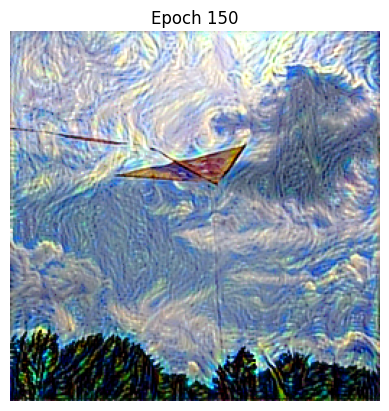

In [26]:
image = model.fit(content_1, style_image, weights, n_epochs=150, version="cocotest", save=False, verbose=10)

In [34]:
# Batch the two images
content_batch = tf.concat([content_1, content_2], axis=0)

In [36]:
dataset = tf.data.Dataset.from_tensor_slices(content_batch)
dataset = dataset.batch(4)

In [37]:
dataset

<_BatchDataset element_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)>